In [54]:
import torch
import matplotlib.pyplot as plt

# Inner Product

In [2]:
x = torch.randn(2)

In [3]:
torch.inner(x, x)

tensor(0.1985)

Read: multiply-sum over the $i$ index of the first and second vector.

In [4]:
torch.einsum('i, i', x, x)

tensor(0.1985)

# Batch Inner Product

In [5]:
x = torch.randn(2, 2)

res = []
for i in range(len(x)):
    res.append(torch.inner(x[i], x[i]))
torch.stack(res)

tensor([0.4572, 3.5712])

In [6]:
torch.einsum('bi, bi -> b', x, x)

tensor([0.4572, 3.5712])

Read: keep the batch dimension, multiply-sum over the $i$ dimension in both.

# Outer Product

In [7]:
x = torch.randn(2)

In [8]:
torch.outer(x, x)

tensor([[0.0998, 0.0699],
        [0.0699, 0.0489]])

In [9]:
torch.einsum('i, j -> ij', x, x)

tensor([[0.0998, 0.0699],
        [0.0699, 0.0489]])

Read: go over the $i$ dimension in the first, go over the $j$ dimension in the second (same) and multiply sum them both (for each $i$ and $j$).

# Batch Outer Product

In [10]:
x = torch.randn(2, 2)

res = []
for i in range(len(x)):
    res.append(torch.outer(x[i], x[i]))
torch.stack(res)

tensor([[[ 0.4404, -0.1832],
         [-0.1832,  0.0762]],

        [[ 0.0939,  0.1658],
         [ 0.1658,  0.2931]]])

In [11]:
torch.einsum('bi, bj -> bij', x, x)

tensor([[[ 0.4404, -0.1832],
         [-0.1832,  0.0762]],

        [[ 0.0939,  0.1658],
         [ 0.1658,  0.2931]]])

# Matrix Multiplication

In [12]:
x = torch.randn(2, 2)

In [13]:
torch.matmul(x, x)

tensor([[ 0.0209, -0.0326],
        [ 0.3890,  0.3148]])

In [14]:
torch.einsum('ij, jk -> ik', x, x)

tensor([[ 0.0209, -0.0326],
        [ 0.3890,  0.3148]])

# Batch Matrix Multiplication

In [15]:
x = torch.randn(3, 2, 2)

In [16]:
res = []
for i in range(len(x)):
    res.append(torch.matmul(x[i], x[i]))
torch.stack(res)

tensor([[[ 3.4295,  0.1025],
         [ 0.2982,  2.9269]],

        [[ 1.8096, -1.2166],
         [-0.7201,  0.6364]],

        [[ 0.1067,  0.3200],
         [ 0.0209,  0.1166]]])

In [17]:
torch.einsum('bij, bjk -> bik', x, x)

tensor([[[ 3.4295,  0.1025],
         [ 0.2982,  2.9269]],

        [[ 1.8096, -1.2166],
         [-0.7201,  0.6364]],

        [[ 0.1067,  0.3200],
         [ 0.0209,  0.1166]]])

# Transpose

In [18]:
x = torch.randn(2, 2)

In [19]:
x.T

tensor([[ 0.6683, -0.9210],
        [-2.5787,  0.4541]])

In [20]:
torch.einsum('ij -> ji', x)

tensor([[ 0.6683, -0.9210],
        [-2.5787,  0.4541]])

# Batch Transpose

In [21]:
x = torch.randn(3, 2, 2)

In [22]:
x.permute(0, -1, -2)

tensor([[[ 1.1203, -0.1880],
         [-0.1369, -1.5195]],

        [[ 0.8562, -0.3889],
         [ 0.4840,  0.6303]],

        [[ 0.3615, -0.2740],
         [ 0.1358, -0.1682]]])

In [23]:
torch.einsum('bij -> bji', x)

tensor([[[ 1.1203, -0.1880],
         [-0.1369, -1.5195]],

        [[ 0.8562, -0.3889],
         [ 0.4840,  0.6303]],

        [[ 0.3615, -0.2740],
         [ 0.1358, -0.1682]]])

# Tensor Product

In [24]:
x = torch.randn(2, 2, 2)

In [25]:
torch.tensordot(x, x)

tensor([[ 0.0733,  0.3096],
        [-0.2833,  2.9506]])

# Element-Wise 

In [26]:
x = torch.randn(2, 2)

In [27]:
x * x

tensor([[0.0035, 0.8287],
        [0.1912, 2.0805]])

In [28]:
torch.einsum('ij, ij -> ij', x, x)

tensor([[0.0035, 0.8287],
        [0.1912, 2.0805]])

Multiply over all these, and sum over the ones that are left out.

# Batch Element-Wise

In [29]:
x = torch.randn(2, 2, 2)

In [30]:
torch.einsum('bij, bij -> bij', x, x)

tensor([[[1.6724, 1.9191],
         [0.1529, 3.0415]],

        [[0.4018, 0.0397],
         [1.7389, 8.5126]]])

In [31]:
x * x

tensor([[[1.6724, 1.9191],
         [0.1529, 3.0415]],

        [[0.4018, 0.0397],
         [1.7389, 8.5126]]])

# Element-Wise with Broadcasting

In [32]:
x = torch.randn(2, 2)
y = torch.randn(2, 2, 1)

In [33]:
z = x * y

In [34]:
z.shape

torch.Size([2, 2, 2])

In [35]:
z

tensor([[[ 0.2491,  2.0490],
         [ 0.1035,  0.0257]],

        [[-0.1061, -0.8727],
         [ 2.0519,  0.5089]]])

In [36]:
torch.einsum('ij, kij -> kij', x, y)

tensor([[[ 0.2491,  2.0490],
         [ 0.1035,  0.0257]],

        [[-0.1061, -0.8727],
         [ 2.0519,  0.5089]]])

Note that we're broadcasting $y$ over the final dimension. Then we are performing the element-wise product.

In [37]:
y = torch.randn(2, 2, 2)

In [38]:
x = torch.randn(2, 2)

In [39]:
x * y

tensor([[[-0.1545, -0.3232],
         [-0.0143, -0.2030]],

        [[ 0.2096, -1.8457],
         [ 0.3654,  0.1658]]])

By the same convention:

In [40]:
torch.einsum('ij, kij -> kij', x, y)

tensor([[[-0.1545, -0.3232],
         [-0.0143, -0.2030]],

        [[ 0.2096, -1.8457],
         [ 0.3654,  0.1658]]])

# Element-wise and Transpose

In [41]:
torch.einsum('ij, kij -> kij', x, y).permute(0, -1, -2)

tensor([[[-0.1545, -0.0143],
         [-0.3232, -0.2030]],

        [[ 0.2096,  0.3654],
         [-1.8457,  0.1658]]])

In [42]:
torch.einsum('ij, kij -> kji', x, y)

tensor([[[-0.1545, -0.0143],
         [-0.3232, -0.2030]],

        [[ 0.2096,  0.3654],
         [-1.8457,  0.1658]]])

But we can change the default behavior (over the last dimensions) by changing the indexing:

In [43]:
torch.einsum('ij, ijk -> ijk', x, y)

tensor([[[-0.1545, -0.0592],
         [-0.0566,  1.1289]],

        [[ 0.2881, -0.4648],
         [-0.2609,  0.1658]]])

x = torch.randn(20, 8)

In [44]:
x = torch.randn(20, 2)
y = torch.randn(8)

In [45]:
op = x[..., None].matmul(y[None, None])

In [46]:
el = x[..., None] * y[None, None]

In [47]:
torch.allclose(op, el)

True

# Gaussians

In [56]:
x = torch.linspace(-3, 3, 128)

In [57]:
x = torch.exp(-(x ** 2))

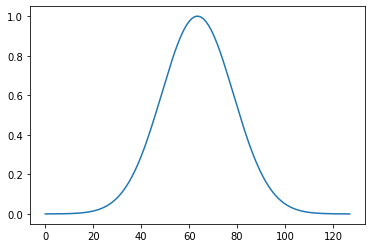

In [58]:
plt.plot(x)

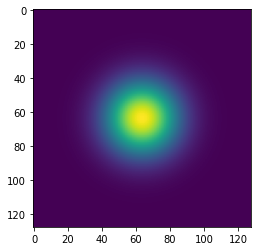

In [60]:
plt.imshow(x[None, :] * x[:, None])

# Diagonal

In [62]:
X = torch.randn(3, 3)

In [68]:
torch.einsum('ii, ii -> i', X, torch.ones_like(X))

tensor([ 0.5959, -0.1834, -1.2500])

In [71]:
torch.einsum('ii -> i', X)

tensor([ 0.5959, -0.1834, -1.2500])